In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support

### Step 1: Load Data

In [26]:
df = pd.read_csv('ecommerce_customer_data.csv')
df.head(10)

,customer_id,name,email,age,gender,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
0,a3071abd-8922-4608-95af-676364cb411d,Erica Powers,houseariana@example.net,56,Male,41672,11,170.75,14,5,0
1,114a0236-61b3-4447-964c-dbe6ac3d0773,Sarah Jones,ufranklin@example.org,46,Female,78217,9,63.17,8,4,0
2,c2fcf312-df91-400a-ab0e-822c1fab051a,Jaime Peterson,james10@example.com,32,Female,28279,10,55.09,8,2,0
3,7885497e-eb68-4c32-b4a3-b110d6af8aae,Rebecca Wolfe,pricedustin@example.org,60,Female,17017,15,110.88,18,4,0
4,b212448f-04ae-4943-a90e-0c8500b486fc,Kenneth Peterson,qwyatt@example.net,25,Male,56600,10,158.37,42,3,1
5,539742e8-319f-475e-a05f-2cb5840a38ab,Brenda Collins,jasonlee@example.net,38,Male,42469,6,31.15,6,5,0
6,6feaa27d-0cfe-4aa4-9182-146ff06a46f7,Robert Fitzgerald,twilson@example.org,56,Male,34681,6,123.83,37,3,0
7,10b503cd-2598-4bf1-931d-78fa61726720,Chris Preston,qmartinez@example.com,36,Male,60625,8,41.46,0,3,1
8,ff641f8b-9ca6-477e-a075-52f885d3a698,Brittany Shaffer,brian01@example.org,40,Male,53657,16,26.56,16,2,1
9,0216b5f7-88f3-4158-a52c-4af58a3e68be,Joseph Hampton,apeters@example.net,28,Male,41538,10,29.49,44,1,0


### Step 2: Data Cleaning & Preprocessing

In [27]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['customer_id', 'name', 'email'])

# Encode categorical variables
label_encoder = LabelEncoder()
df_cleaned['gender'] = label_encoder.fit_transform(df_cleaned['gender'])

### Step 3: Exploratory Data Analysis (EDA)

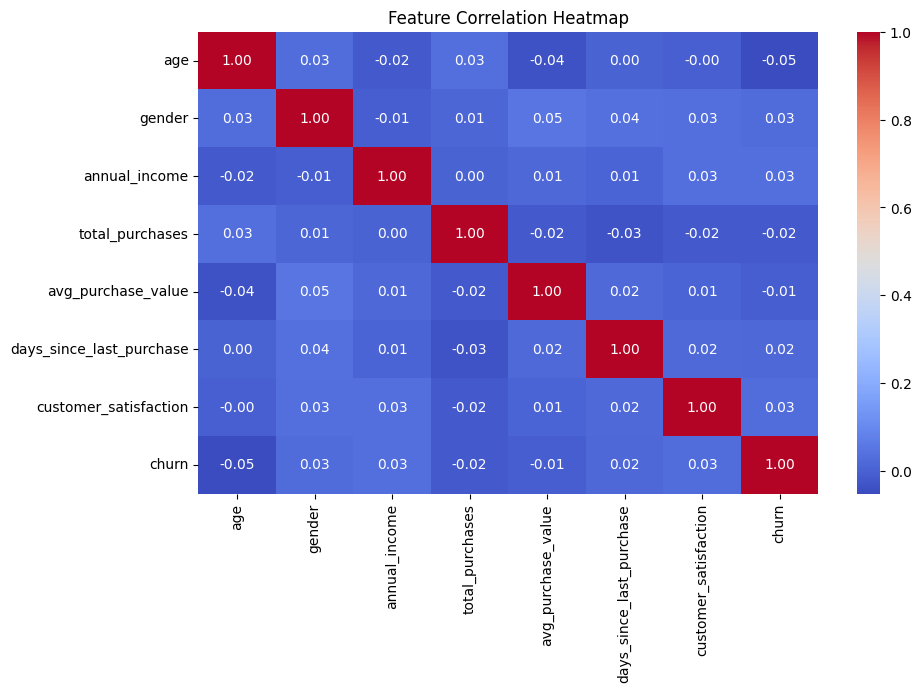

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

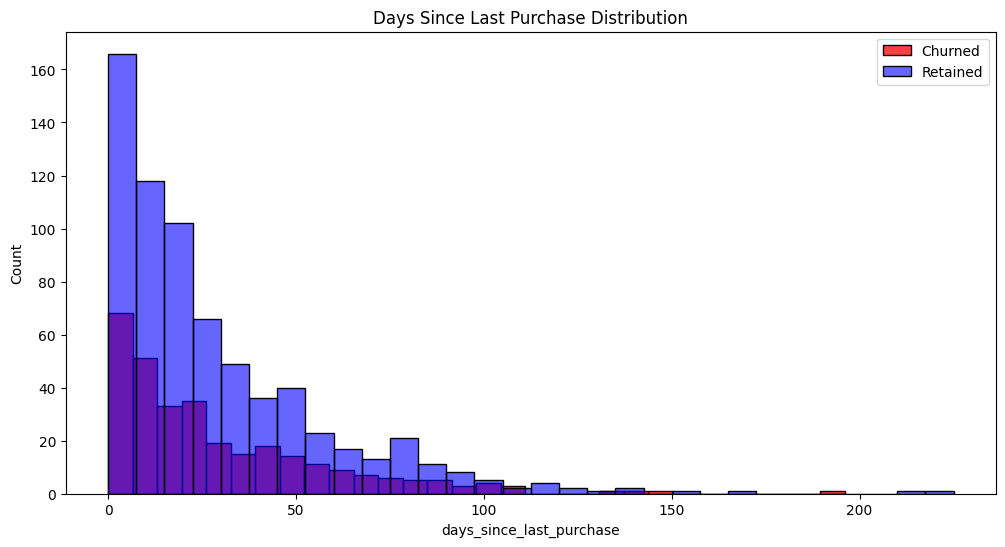

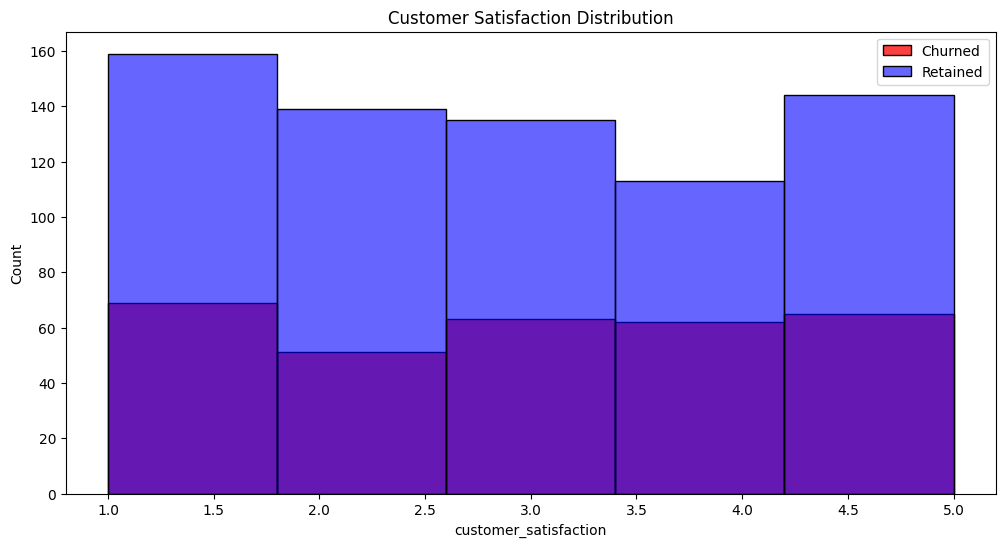

In [29]:
# Data Visualization: Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned[df_cleaned['churn'] == 1]['days_since_last_purchase'], bins=30, color='red', label='Churned')
sns.histplot(df_cleaned[df_cleaned['churn'] == 0]['days_since_last_purchase'], bins=30, color='blue', label='Retained', alpha=0.6)
plt.title('Days Since Last Purchase Distribution')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned[df_cleaned['churn'] == 1]['customer_satisfaction'], bins=5, color='red', label='Churned')
sns.histplot(df_cleaned[df_cleaned['churn'] == 0]['customer_satisfaction'], bins=5, color='blue', label='Retained', alpha=0.6)
plt.title('Customer Satisfaction Distribution')
plt.legend()
plt.show()

### Step 4: Feature Engineering

In [30]:
df_cleaned['purchase_frequency'] = df_cleaned['total_purchases'] / (df_cleaned['days_since_last_purchase'] + 1)
df_cleaned['customer_value'] = df_cleaned['total_purchases'] * df_cleaned['avg_purchase_value']
df_cleaned['loyalty_score'] = df_cleaned['total_purchases'] / (df_cleaned['customer_satisfaction'] + 1)

### Step 5: Prepare Data for Model Training

In [31]:
X = df_cleaned.drop(columns=['churn'])
y = df_cleaned['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step 6: Train and Evaluate Models

In [36]:
# Logistic Regression with Class Weighting & Improved Solver
log_reg = LogisticRegression(random_state=42, class_weight='balanced', solver='saga')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
log_auc = roc_auc_score(y_test, y_prob_log)
log_precision, log_recall, log_f1, _ = precision_recall_fscore_support(y_test, y_pred_log, average='binary')

print("Logistic Regression AUC:", log_auc)
print("Precision:", log_precision, "Recall:", log_recall, "F1-score:", log_f1)
print(classification_report(y_test, y_pred_log))


Logistic Regression AUC: 0.5258298270219729
Precision: 0.31496062992125984 Recall: 0.6451612903225806 F1-score: 0.42328042328042326
              precision    recall  f1-score   support

           0       0.70      0.37      0.48       138
           1       0.31      0.65      0.42        62

    accuracy                           0.46       200
   macro avg       0.51      0.51      0.45       200
weighted avg       0.58      0.46      0.46       200



C:\Users\abhay\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
rf_auc = roc_auc_score(y_test, y_prob_rf)
print("Random Forest AUC:", rf_auc)
print(classification_report(y_test, y_pred_rf))

Random Forest AUC: 0.48357877512856473
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       138
           1       0.24      0.08      0.12        62

    accuracy                           0.64       200
   macro avg       0.46      0.48      0.45       200
weighted avg       0.54      0.64      0.57       200



In [ ]:
# XGBoost with Class Balancing
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier( eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
xgb_auc = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost AUC:", xgb_auc)
print(classification_report(y_test, y_pred_xgb))


XGBoost AUC: 0.5092332865825152
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       138
           1       0.33      0.31      0.32        62

    accuracy                           0.59       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.58      0.59      0.59       200

